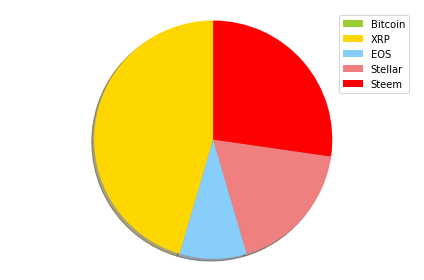

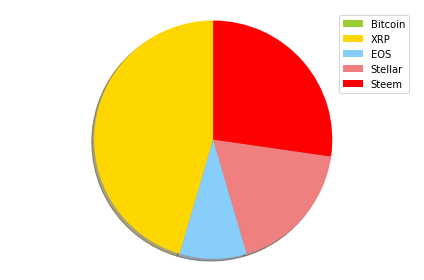

In [3]:
import matplotlib.pyplot as plt
from tkinter import *
import requests
import json
import os
os.system('cls')

#####################################
def red_green(amount):
    if amount >= 0:
       return "green"
    else:
        return "red" 

root = Tk()
root.title("Crypto Currency Portfolio")

# *************************CREATE HEADER*******************************
#header = ["Name", "Rank", "Current Price", "Price Paid", "P/L Per", "1-Hour Change", "24-Hour Change", "7-Day Change", "Current Value", "p/L To"]

header_name = Label(root, text="Name", bg="white", font = "Verdana 8 bold")
header_name.grid(row=0, column=0, sticky=N+S+E+W)

header_rank = Label(root, text="Rank", bg="silver", font = "Verdana 8 bold")
header_rank.grid(row=0, column=1, sticky=N+S+E+W)

header_current_price = Label(root, text="Current Price", bg="white", font = "Verdana 8 bold")
header_current_price.grid(row=0, column=2, sticky=N+S+E+W)

header_price_paid = Label(root, text="Price Paid", bg="silver", font = "Verdana 8 bold")
header_price_paid.grid(row=0, column=3, sticky=N+S+E+W)

header_profit_loss_per = Label(root, text="Profit/Loss Per", bg="white", font = "Verdana 8 bold")
header_profit_loss_per.grid(row=0, column=4, sticky=N+S+E+W)

header_1_hr_change = Label(root, text="1 HR Change", bg="silver", font = "Verdana 8 bold")
header_1_hr_change.grid(row=0, column=5, sticky=N+S+E+W)

header_24_hr_change = Label(root, text="24 HR Change", bg="white", font = "Verdana 8 bold")
header_24_hr_change.grid(row=0, column=6, sticky=N+S+E+W)

header_7_day_change = Label(root, text="7 Day Change", bg="silver", font = "Verdana 8 bold")
header_7_day_change.grid(row=0, column=7, sticky=N+S+E+W)

header_current_value = Label(root, text="current Value", bg="white", font = "Verdana 8 bold")
header_current_value.grid(row=0, column=8, sticky=N+S+E+W)

header_name = Label(root, text="Profit/Loss Total", bg="silver", font = "Verdana 8 bold")
header_name.grid(row=0, column=9, sticky=N+S+E+W)

#*********************** END HEADER SECTION ***************************

api_request = requests.get("https://api.coinmarketcap.com/v1/ticker/")
api = json.loads(api_request.content)

portfolio_profit_loss = 0
def lookup():
    api_request = requests.get("https://api.coinmarketcap.com/v1/ticker/")
    api = json.loads(api_request.content)
# my Portfolio
my_portfolio = [
     {

           "sym": "BTC",
           "amount_owned": 0,
           "price_paid_per": 0
      },


      { 
      "sym": "STEEM",
           "amount_owned": 3000,
           "price_paid_per": .80
      },

      {

           "sym": "XRP",
           "amount_owned": 5000,
           "price_paid_per": .20
      },

       {

           "sym": "XLM",
           "amount_owned": 2000,
           "price_paid_per": .10
      },


       {

           "sym": "EOS",
           "amount_owned": 1000,
           "price_paid_per": 2.00
      }
  ]
portfolio_profit_loss = 0
total_current_value = 0
row_count = 1
pie = []
pie_size = []
for x in api:
      for coin in my_portfolio:
          if coin["sym"] == x["symbol"]:

            # Do some math
            total_paid = float(coin["amount_owned"]) * float(coin["price_paid_per"])
            current_value = float(coin["amount_owned"]) * float(x["price_usd"])
            profit_loss = current_value - total_paid
            portfolio_profit_loss += profit_loss
            profit_loss_per_coin = float(x["price_usd"]) - float(coin["price_paid_per"])
            total_current_value += current_value 
            pie.append(x["name"])
            pie_size.append(coin["amount_owned"])

            #print(x["name"])
            #print(" Current Price: ${0:.2f}".format(float(x["price_usd"])))
            #print(" Profit/Loss Per Coin: ${0:.2f}".format(float(profit_loss_per_coin)))
            #print(" Rank:{0:.0f}".format(float(x["rank"])))
            #print(" Total Paid: ${0:.2f}".format(float(total_paid)))
            #print(" Current Value: ${0:.2f}".format(float(current_value)))
            #print(" Profit/Loss: ${0:.2f}".format(float(profit_loss)))
            #print("========================================")

        

            name = Label(root, text=x["name"], bg="white")
            name.grid(row=row_count, column=0, sticky=N+S+E+W)

            rank = Label(root, text=x["rank"], bg="silver")
            rank.grid(row=row_count, column=1, sticky=N+S+E+W)

            current_price = Label(root, text="${0:.2f}".format(float(x["price_usd"])), bg="white")
            current_price.grid(row=row_count, column=2, sticky=N+S+E+W)

            price_paid = Label(root, text="${0:.2f}".format(float(coin["price_paid_per"])), bg="silver")
            price_paid.grid(row=row_count, column=3, sticky=N+S+E+W)
            
            profit_loss_per = Label(root, text="${0:.2f}".format(float(profit_loss_per_coin)), bg="white", fg=red_green(float(profit_loss_per_coin)))
            profit_loss_per.grid(row=row_count, column=4, sticky=N+S+E+W)
            
            one_hr_change = Label(root, text="${0:.2f}".format(float(x["percent_change_1h"])), bg="silver", fg=red_green(float(x["percent_change_1h"])))
            one_hr_change.grid(row=row_count, column=5, sticky=N+S+E+W)

            tf_hr_change = Label(root, text="${0:.2f}".format(float(x["percent_change_24h"])), bg="white", fg=red_green(float(x["percent_change_24h"])))
            tf_hr_change.grid(row=row_count, column=6, sticky=N+S+E+W)

            seven_day_change= Label(root, text="${0:.2f}".format(float(x["percent_change_7d"])), bg="silver", fg=red_green(float(x["percent_change_7d"])))
            seven_day_change.grid(row=row_count, column=7, sticky=N+S+E+W)

            current_value= Label(root, text=" ${0:.2f}".format(float(current_value)), bg="white", fg=red_green(float(current_value)))
            current_value.grid(row=row_count, column=8, sticky=N+S+E+W)
            
            profit_loss_total= Label(root, text="${0:.2f}".format(float(profit_loss)), bg="silver", fg=red_green(float(profit_loss)))
            profit_loss_total.grid(row=row_count, column=9, sticky=N+S+E+W)
             

            row_count += 1 
portfolio_profits = Label(root, text="P/L: ${0:.2f}".format(float(portfolio_profit_loss)),font = "Verdana 8 bold", fg=red_green(float(portfolio_profit_loss)))
portfolio_profits.grid(row=row_count, column=0, sticky=W, padx=10, pady=10)

root.title("Crypto Currency Portfolio - Portfolio Value ${0:.2f}".format(float(total_current_value )))
#total_current_value_output = portfolio_profits = Label(root, text="P/L: ${0:.2f}".format(float(total_current_value )),font = "Verdana 8 bold", fg=red_green(float(portfolio_profit_loss)))
#total_current_value_output.grid(row=row_count+1, column=1, sticky=W, padx=10, pady=10)
api = ""
update_button = Button(root, text="Update Prices", command=lookup)
update_button.grid(row=row_count, column=9, sticky=E+S, padx=10, pady=10)

def graph(pie, pie_size):
    labels = pie
    sizes = pie_size
    colors = ['yellowgreen', 'gold','lightskyblue',  'lightcoral', 'red']
    patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90)
    plt.legend(patches, labels, loc="best")
    plt.axis('equal')
    plt.tight_layout()
    plt.show()
graph_button = Button(root, text="Pie Chart", command=lambda: graph(pie, pie_size))
graph_button.grid(row=row_count, column=8, sticky=E+S, padx=10, pady=10)
lookup()
root.mainloop()